In [1]:
import numpy as np
import matplotlib.pyplot as plt

EMPTY = 0
WALL  = 1
ROBOT = 5
BOX   = 2
BOXLEFT = BOX
BOXRIGHT = 3

def read_input_15(filename):
    f = open(filename)
    inp = f.read().split("\n\n")
    instructions = inp[1].replace("\n","")
    lines = inp[0].split()
    grid = np.zeros((len(lines),len(lines[0])),dtype=int)
    robot = (0,0)
    for r,l in enumerate(lines):
        for c,v in enumerate(l):
            if v=="#":
                grid[r,c] = WALL
            elif v=="O":
                grid[r,c] = BOX
            elif v=="@":
                grid[r,c] = ROBOT
                robot = (r,c)
    return grid,robot,instructions 

moves = {"<": (0,-1), ">": (0,+1), "^": (-1,0), "v": (+1,0)}

def items_to_move_simple(instr,grid,robot):
    dr,dc = moves[instr]
    to_be_moved = [robot]
    p = robot
    while True:
        rp,cp = p
        r1,c1 = rp+dr,cp+dc
        if grid[r1,c1]==WALL:
            return []
        if grid[r1,c1]==EMPTY:
            return to_be_moved
        to_be_moved.append((r1,c1))
        p = r1,c1

def move_boxes(to_be_moved,instr,grid,robot):
    if len(to_be_moved):
        dr,dc = moves[instr]
        values = [ grid[r,c] for r,c in to_be_moved ]
        # clean region to be moved (needed for part 2, since items to move are not on straight line)
        for (r,c) in to_be_moved: 
            grid[r,c] = EMPTY
        for (r,c),v in zip(to_be_moved,values):
            rn,cn = r+dr,c+dc
            grid[rn,cn] = v
        r,c = robot
        grid[r,c] = EMPTY
        robot = to_be_moved[0][0]+dr,to_be_moved[0][1]+dc
    return grid, robot    

def evolve_grid(grid,robot,instructions):
    for instr in instructions:
        to_be_moved = items_to_move_simple(instr,grid,robot)
        grid,robot = move_boxes(to_be_moved,instr,grid,robot)
    return grid,robot

def sum_gps(grid):
    sumgps = 0
    for r,l in enumerate(grid):
        for c,v in enumerate(l):
            if v==BOX:
                sumgps += 100*r+c
    return sumgps

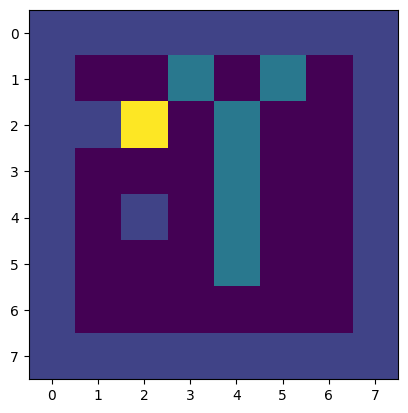

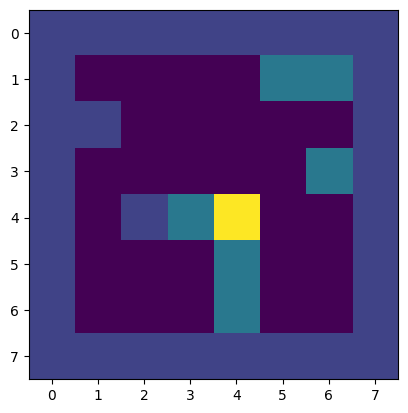

2028

In [2]:
filename = "examples/example15-1.txt"
grid,robot,instructions = read_input_15(filename)

plt.imshow(grid)
plt.show()

grid,robot = evolve_grid(grid,robot,instructions)

plt.imshow(grid)
plt.show()

sum_gps(grid)

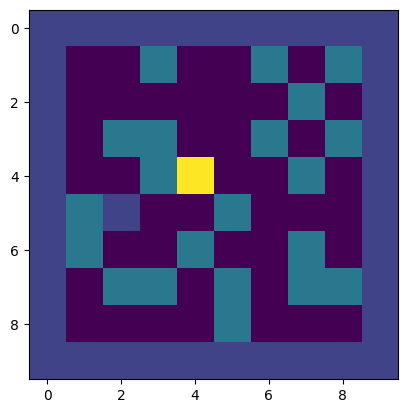

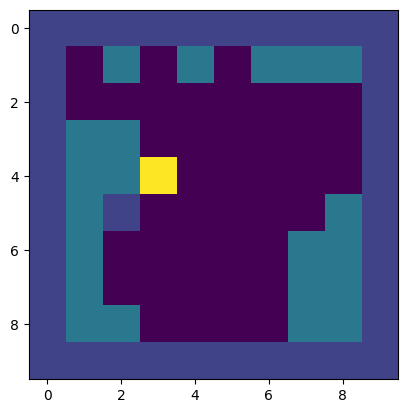

10092

In [3]:
filename = "examples/example15-2.txt"
grid,robot,instructions = read_input_15(filename)

plt.imshow(grid)
plt.show()

grid,robot = evolve_grid(grid,robot,instructions)

plt.imshow(grid)
plt.show()

sum_gps(grid)

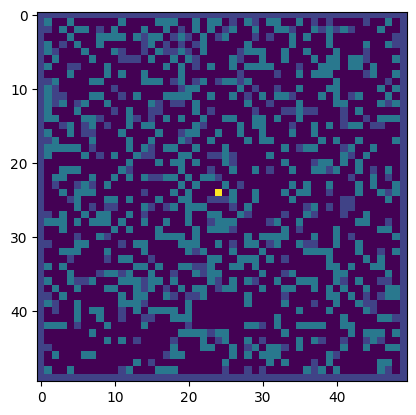

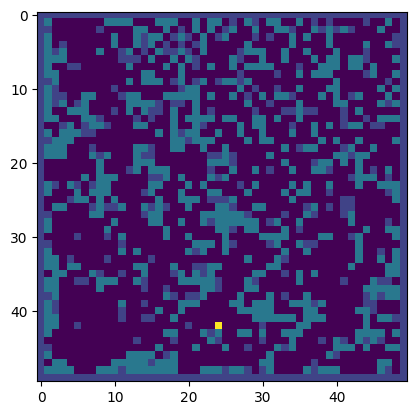

1463512

In [4]:
filename = "AOC2024inputs/input15.txt"
grid,robot,instructions = read_input_15(filename)

plt.imshow(grid)
plt.show()

grid,robot = evolve_grid(grid,robot,instructions)

plt.imshow(grid)
plt.show()

sum_gps(grid)

In [5]:
def expand_grid(grid,robot):
    gridnew = np.zeros((len(grid),2*len(grid[0])),dtype=int)
    robotnew = robot
    for r,l in enumerate(grid):
        for c,v in enumerate(l):
            if v==BOX:
                gridnew[r,2*c] = BOX
                gridnew[r,2*c+1] = BOXRIGHT
            elif v==ROBOT:
                gridnew[r,2*c] = grid[r,c]
                robotnew = (r,2*c)
            elif v==WALL:
                gridnew[r,2*c] = WALL
                gridnew[r,2*c+1] = WALL
    return gridnew,robotnew

(4, 8)


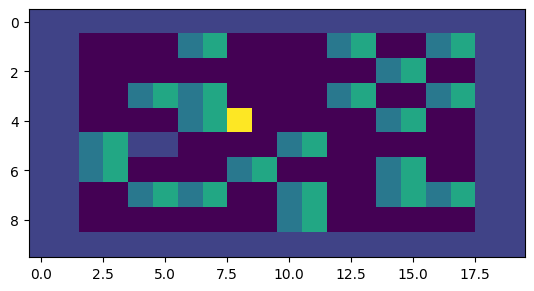

In [6]:
filename = "examples/example15-2.txt"
grid,robot,instructions = read_input_15(filename)
gridnew,robotnew = expand_grid(grid,robot)
plt.imshow(gridnew)
print(robotnew)

In [7]:
from queue import Queue

def items_to_move_vertical(instr,grid,robot):
    dr,dc = moves[instr]
    rr,cr = robot
    r1,c1 = rr+dr,cr+dc
    if grid[r1,c1]==WALL:
        return []
    elif grid[r1,c1]==EMPTY:
        return [robot]
        
    to_be_moved = [robot]

    if grid[r1,c1]==BOXLEFT:
        box = ((r1,c1),(r1,c1+1))
    else:
        box = ((r1,c1-1),(r1,c1))

    boxes = Queue()
    boxes.put(box)
    visited = set() # keep track each considered box, since they might overlap two boxes
    
    while not boxes.empty():
        box = boxes.get()
        if box in visited:
            continue
        visited.add(box)
        for coord in box:
            to_be_moved.append(coord)
            rb, cb = coord
            nextbox = None
            r1,c1 = rb+dr,cb+dc 
            if grid[r1,c1]==WALL:
                return []
            if grid[r1,c1]==EMPTY:
                continue
            if grid[r1,c1]==BOXLEFT:
                nextbox = ((r1,c1),(r1,c1+1))
            else:
                nextbox = ((r1,c1-1),(r1,c1))
            if nextbox and nextbox not in visited:
                boxes.put(nextbox)

    return to_be_moved

def evolve_grid_2(grid,robot,instructions,verbose=False):
    for instr in instructions:
        if verbose: print(instr,robot)
        if instr=="<" or instr==">": # horizontal movements as in part 1 
            to_be_moved = items_to_move_simple(instr,grid,robot)
        else: # vertical movements
            to_be_moved = items_to_move_vertical(instr,grid,robot)
        grid,robot = move_boxes(to_be_moved,instr,grid,robot)
        if verbose:
            plt.imshow(grid)
            plt.show()
    return grid,robot

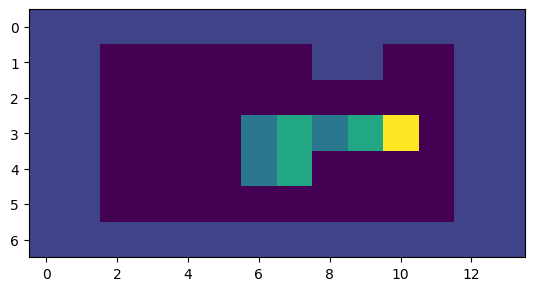

< (3, 10)


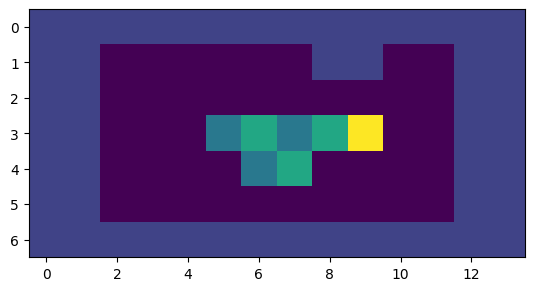

v (3, 9)


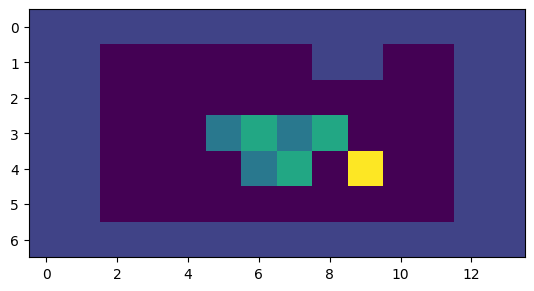

v (4, 9)


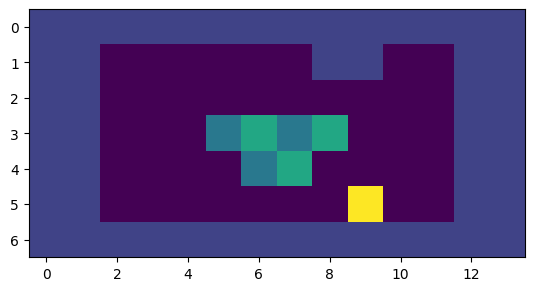

< (5, 9)


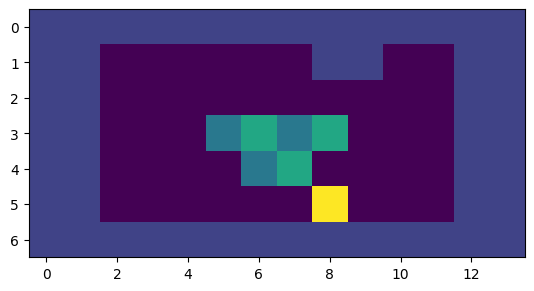

< (5, 8)


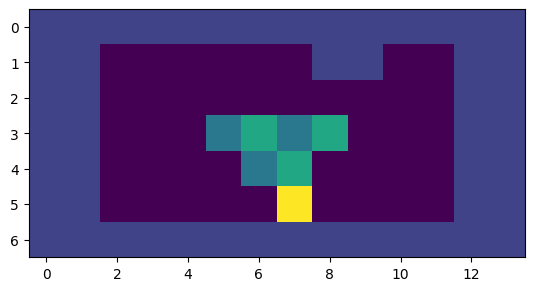

^ (5, 7)


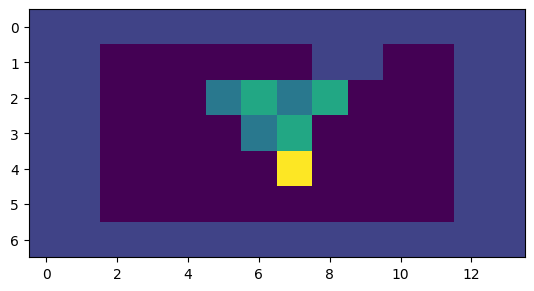

^ (4, 7)


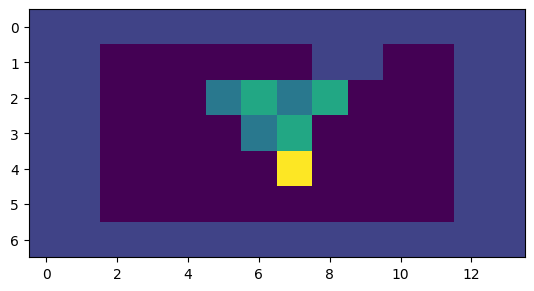

< (4, 7)


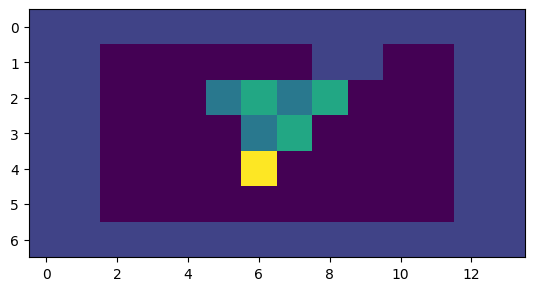

< (4, 6)


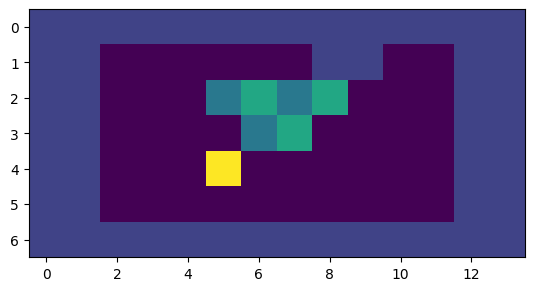

^ (4, 5)


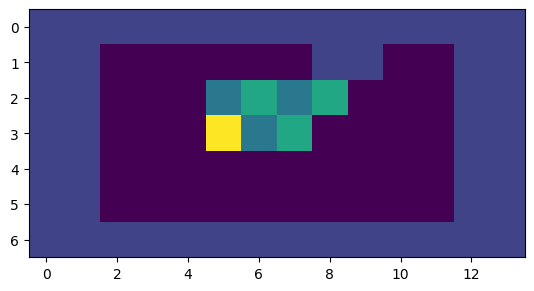

^ (3, 5)


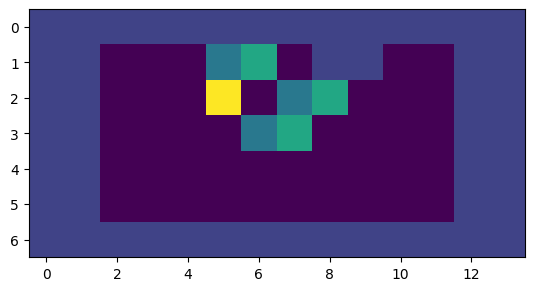

618

In [8]:
filename = "examples/example15-3.txt"
grid,robot,instructions = read_input_15(filename)
gridnew,robotnew = expand_grid(grid,robot)

plt.imshow(gridnew)
plt.show()

gridnew,robotnew = evolve_grid_2(gridnew,robotnew,instructions,verbose=True)

sum_gps(gridnew)

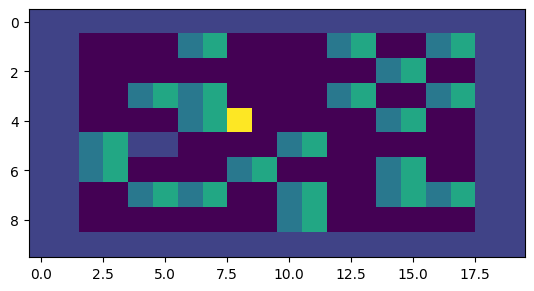

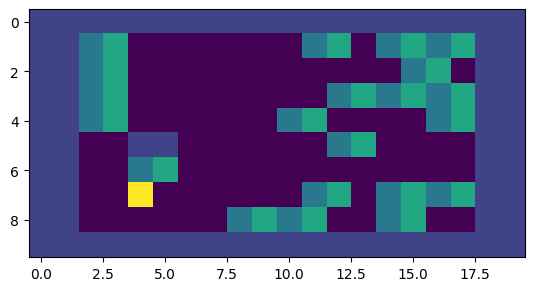

9021

In [9]:
filename = "examples/example15-2.txt"
grid,robot,instructions = read_input_15(filename)
gridnew,robotnew = expand_grid(grid,robot)

plt.imshow(gridnew)
plt.show()

gridnew,robotnew = evolve_grid_2(gridnew,robotnew,instructions,verbose=False)

plt.imshow(gridnew)
plt.show()

sum_gps(gridnew)

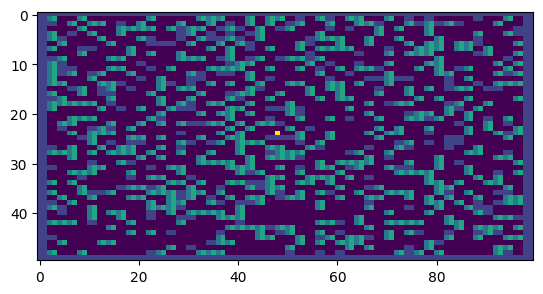

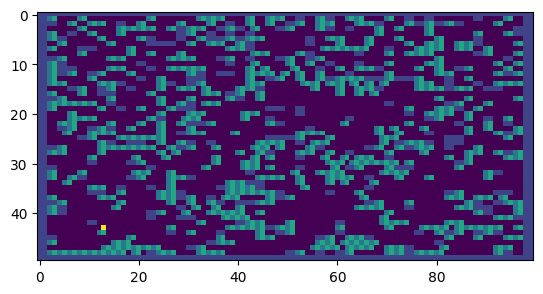

1486520

In [10]:
filename = "AOC2024inputs/input15.txt"
grid,robot,instructions = read_input_15(filename)
gridnew,robotnew = expand_grid(grid,robot)

plt.imshow(gridnew)
plt.show()

gridnew,robotnew = evolve_grid_2(gridnew,robotnew,instructions,verbose=False)

plt.imshow(gridnew)
plt.show()

sum_gps(gridnew)